# Ejercicio2



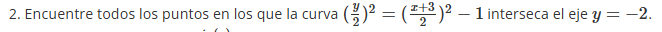

## 1° Corte

- Librerias utilizadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.animation import PillowWriter  # Para guardar GIf

- Metodo de Newton (Grafico sin animacion)

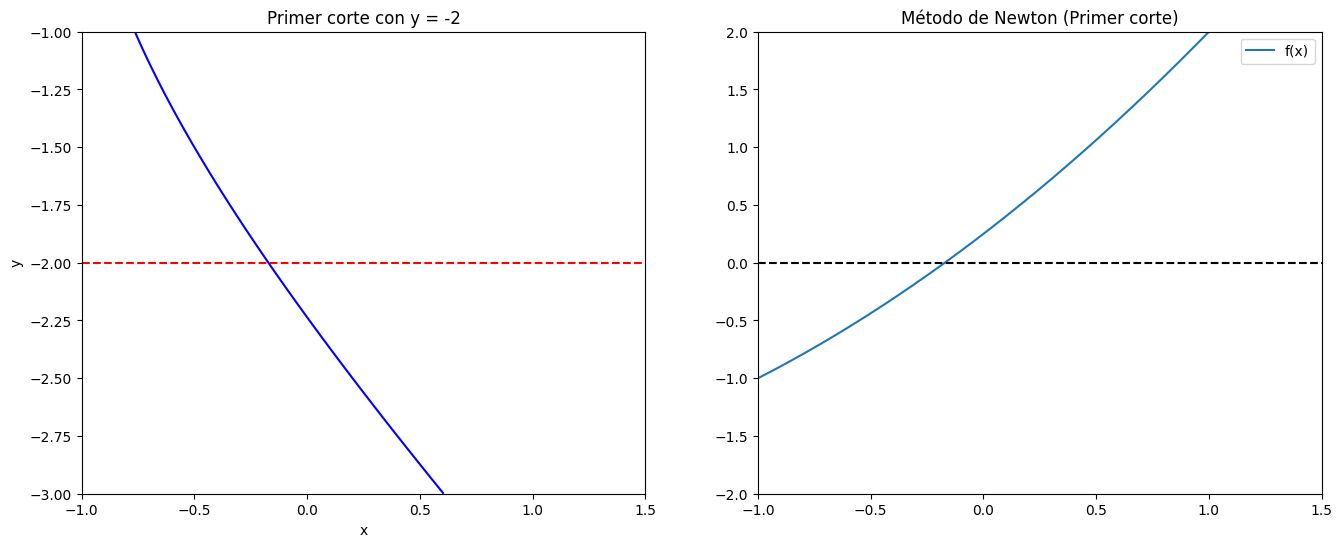

In [3]:
# Configuración
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Función original
def original_curve(x, y):
    return (y/2)**2 - ((x+3)/2)**2 + 1

# Función para Newton (y = -2)
def f(x):
    return ((x + 3)/2)**2 - 2

def df(x):
    return (x + 3)/2

# Configuración gráfico izquierdo (curva original)
x = np.linspace(-1, 1.5, 400)
y = np.linspace(-3, -1, 400)
X, Y = np.meshgrid(x, y)
Z = original_curve(X, Y)

ax1.contour(X, Y, Z, levels=[0], colors='blue')
ax1.axhline(y=-2, color='red', linestyle='--')
ax1.set_xlim(-1, 1.5)
ax1.set_ylim(-3, -1)
ax1.set_title('Primer corte con y = -2')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Configuración gráfico derecho (Newton)
x_vals = np.linspace(-1, 1.5, 400)
ax2.plot(x_vals, f(x_vals), label='f(x)')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlim(-1, 1.5)
ax2.set_ylim(-2, 2)
ax2.set_title('Método de Newton (Primer corte)')
ax2.legend()

point_curve, = ax1.plot([], [], 'go', markersize=10)
point_newton, = ax2.plot([], [], 'ro', markersize=10)
tangent, = ax2.plot([], [], 'orange', linewidth=2)
text_info = ax2.text(0.05, 0.95, '', transform=ax2.transAxes, 
                    bbox=dict(facecolor='white', alpha=0.8))

- Metodo de Newton con pasos en la animacion

In [4]:
# Método de Newton con pasos
def newton_steps(f, df, x0, tol=1e-6, max_iter=10):
    steps = []
    for i in range(max_iter):
        steps.append(x0)
        if abs(f(x0)) < tol:
            break
        x0 = x0 - f(x0)/df(x0)
    return steps

steps = newton_steps(f, df, x0=1.0)  # Comenzamos cerca de la primera raíz

# Animación
def init():
    point_curve.set_data([], [])
    point_newton.set_data([], [])
    tangent.set_data([], [])
    text_info.set_text('')
    return point_curve, point_newton, tangent, text_info

def update(frame):
    if frame < len(steps):
        x = steps[frame]
        
        # Actualizar puntos
        point_curve.set_data([x], [-2])
        point_newton.set_data([x], [f(x)])
        
        # Dibujar tangente
        if frame < len(steps)-1:
            x_tan = np.linspace(x-0.5, x+0.5, 2)
            y_tan = df(x)*(x_tan - x) + f(x)
            tangent.set_data(x_tan, y_tan)
        
        text_info.set_text(f'Iteración {frame+1}\nx = {x:.6f}\nf(x) = {f(x):.6f}')
    
    return point_curve, point_newton, tangent, text_info

ani = FuncAnimation(fig, update, frames=len(steps), 
                    init_func=init, blit=True, interval=1000)

plt.tight_layout()

# Opción para guardar el GIF
guardar_gif = True  # Cambia a False si no quieres guardar el GIF

if guardar_gif:
    try:
        gif_path = "newton_animation.gif"
        writer = PillowWriter(fps=1, bitrate=1800)  # 1 frame por segundo
        ani.save(gif_path, writer=writer)
        print(f"GIF guardado exitosamente en: {gif_path}")
    except ImportError:
        print("Para guardar GIFs necesitas instalar pillow: pip install pillow")
    except Exception as e:
        print(f"Error al guardar el GIF: {str(e)}")

plt.close()

# Mostrar animación en notebook
print("Primer corte encontrado:")
print(f"x = {steps[-1]:.8f} (Valor exacto: {-3 + 2*np.sqrt(2):.8f})")
HTML(ani.to_jshtml())
        

GIF guardado exitosamente en: newton_animation.gif
Primer corte encontrado:
x = -0.17157288 (Valor exacto: -0.17157288)


## 2° Corte

- Metodo de Newton (sin animacion)

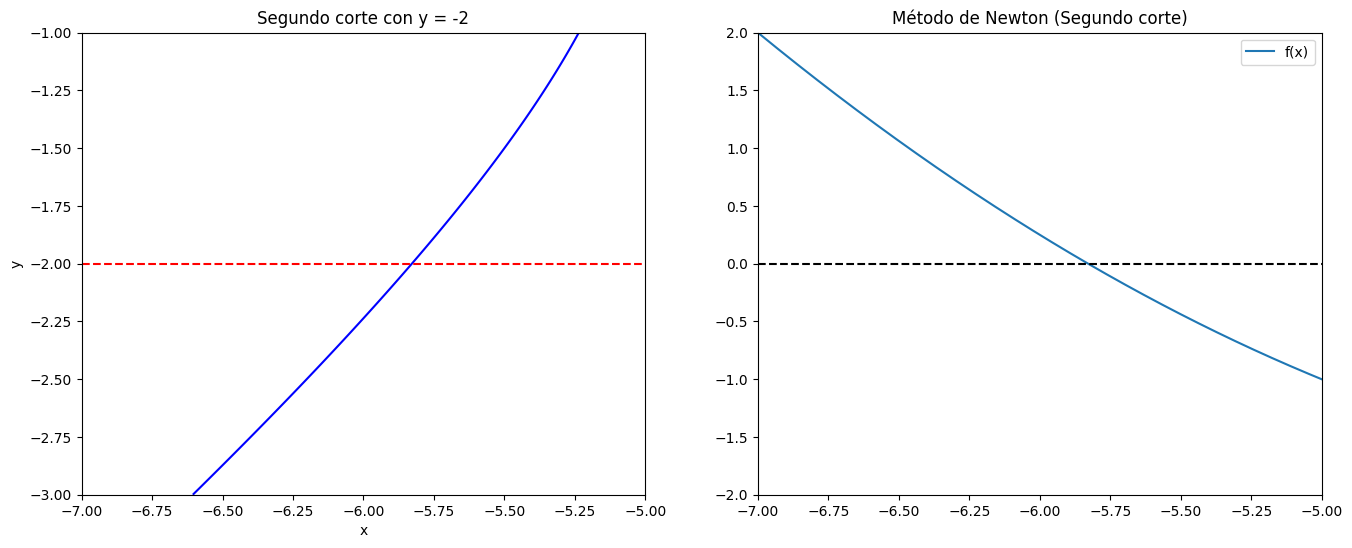

In [5]:
# Configuración
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Función original
def original_curve(x, y):
    return (y/2)**2 - ((x+3)/2)**2 + 1

# Función para Newton (y = -2)
def f(x):
    return ((x + 3)/2)**2 - 2

def df(x):
    return (x + 3)/2

# Configuración gráfico izquierdo (curva original)
x = np.linspace(-7, -5, 400)
y = np.linspace(-3, -1, 400)
X, Y = np.meshgrid(x, y)
Z = original_curve(X, Y)

ax1.contour(X, Y, Z, levels=[0], colors='blue')
ax1.axhline(y=-2, color='red', linestyle='--')
ax1.set_xlim(-7, -5)
ax1.set_ylim(-3, -1)
ax1.set_title('Segundo corte con y = -2')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Configuración gráfico derecho (Newton)
x_vals = np.linspace(-7, -5, 400)
ax2.plot(x_vals, f(x_vals), label='f(x)')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlim(-7, -5)
ax2.set_ylim(-2, 2)
ax2.set_title('Método de Newton (Segundo corte)')
ax2.legend()

# Elementos de animación
point_curve, = ax1.plot([], [], 'go', markersize=10)
point_newton, = ax2.plot([], [], 'ro', markersize=10)
tangent, = ax2.plot([], [], 'orange', linewidth=2)
text_info = ax2.text(0.05, 0.95, '', transform=ax2.transAxes, 
                    bbox=dict(facecolor='white', alpha=0.8))

- Metodo de Newton con pasos en la animacion

In [6]:
# Método de Newton con pasos
def newton_steps(f, df, x0, tol=1e-6, max_iter=10):
    steps = []
    for i in range(max_iter):
        steps.append(x0)
        if abs(f(x0)) < tol:
            break
        x0 = x0 - f(x0)/df(x0)
    return steps

steps = newton_steps(f, df, x0=-5.0)  # Comenzamos cerca de la segunda raíz

# Animación
def init():
    point_curve.set_data([], [])
    point_newton.set_data([], [])
    tangent.set_data([], [])
    text_info.set_text('')
    return point_curve, point_newton, tangent, text_info

def update(frame):
    if frame < len(steps):
        x = steps[frame]
        
        # Actualizar puntos
        point_curve.set_data([x], [-2])
        point_newton.set_data([x], [f(x)])
        
        # Dibujar tangente
        if frame < len(steps)-1:
            x_tan = np.linspace(x-0.5, x+0.5, 2)
            y_tan = df(x)*(x_tan - x) + f(x)
            tangent.set_data(x_tan, y_tan)
        
        text_info.set_text(f'Iteración {frame+1}\nx = {x:.6f}\nf(x) = {f(x):.6f}')
    
    return point_curve, point_newton, tangent, text_info

ani = FuncAnimation(fig, update, frames=len(steps), 
                    init_func=init, blit=True, interval=1000)

plt.tight_layout()

# Opción para guardar el GIF
guardar_gif = True  # Cambia a False si no quieres guardar el GIF

if guardar_gif:
    try:
        gif_path = "newton_segundo_corte.gif"
        writer = PillowWriter(fps=1, bitrate=1800)  # 1 frame por segundo
        ani.save(gif_path, writer=writer)
        print(f"GIF guardado exitosamente en: {gif_path}")
    except ImportError:
        print("Para guardar GIFs necesitas instalar pillow: pip install pillow")
    except Exception as e:
        print(f"Error al guardar el GIF: {str(e)}")

plt.close()

# Mostrar animación en notebook
print("Segundo corte encontrado:")
print(f"x = {steps[-1]:.8f} (Valor exacto: {-3 - 2*np.sqrt(2):.8f})")
HTML(ani.to_jshtml())

GIF guardado exitosamente en: newton_segundo_corte.gif
Segundo corte encontrado:
x = -5.82842712 (Valor exacto: -5.82842712)
